In [39]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
iris = load_iris()

In [41]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['clase'] = iris.target

In [42]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clase
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
X = df.drop("clase",axis=1).values
y = df["clase"].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)


In [45]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [46]:
class Model(nn.Module):
    def __init__(self, input_features=4, hidden_layer1=16, hidden_layer2=12, output_features=3):
        super().__init__()
        self.fc1 = nn.Linear(input_features,hidden_layer1)                  
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)                  
        self.out = nn.Linear(hidden_layer2, output_features)      
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [47]:
model = Model()
model

Model(
  (fc1): Linear(in_features=4, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=12, bias=True)
  (out): Linear(in_features=12, out_features=3, bias=True)
)

In [48]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [49]:
def train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
    for epoch in range(num_epochs):
        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()
        
        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = criterion(output_train, y_train)
        
        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()
        
        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

In [50]:
num_epochs = 1000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [51]:
train_network(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses)

Epoch 50/1000, Train Loss: 0.2425, Test Loss: 0.2579
Epoch 100/1000, Train Loss: 0.0633, Test Loss: 0.0991
Epoch 150/1000, Train Loss: 0.0492, Test Loss: 0.0875
Epoch 200/1000, Train Loss: 0.0423, Test Loss: 0.0911
Epoch 250/1000, Train Loss: 0.0377, Test Loss: 0.0981
Epoch 300/1000, Train Loss: 0.0341, Test Loss: 0.1046
Epoch 350/1000, Train Loss: 0.0312, Test Loss: 0.1099
Epoch 400/1000, Train Loss: 0.0288, Test Loss: 0.1143
Epoch 450/1000, Train Loss: 0.0270, Test Loss: 0.1181
Epoch 500/1000, Train Loss: 0.0255, Test Loss: 0.1215
Epoch 550/1000, Train Loss: 0.0244, Test Loss: 0.1248
Epoch 600/1000, Train Loss: 0.0242, Test Loss: 0.1316
Epoch 650/1000, Train Loss: 0.0229, Test Loss: 0.1321
Epoch 700/1000, Train Loss: 0.0226, Test Loss: 0.1371
Epoch 750/1000, Train Loss: 0.0220, Test Loss: 0.1394
Epoch 800/1000, Train Loss: 0.0222, Test Loss: 0.1471
Epoch 850/1000, Train Loss: 0.0214, Test Loss: 0.1468
Epoch 900/1000, Train Loss: 0.0209, Test Loss: 0.1549
Epoch 950/1000, Train Loss: 0

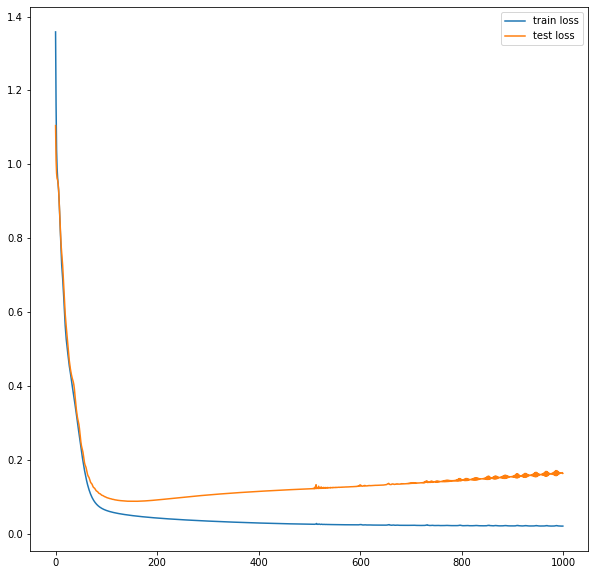

In [52]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [53]:
#epochs = torch.FloatTensor(epochs)
#losses = torch.FloatTensor(losses)

In [54]:
preds = []
with torch.no_grad():
    for val in X_test:
        y_hat = model.forward(val)
        preds.append(y_hat.argmax().item())

In [55]:
df = pd.DataFrame({'Y': y_test, 'YHat': preds})
df['Correct'] = [1 if corr == pred else 0 for corr, pred in zip(df['Y'], df['YHat'])]

In [56]:
df

,Y,YHat,Correct
0,0,0,1
1,0,0,1
2,2,1,0
3,1,1,1
4,0,0,1
5,1,1,1
6,1,1,1
7,2,2,1
8,0,0,1
9,1,1,1


In [57]:
df['Correct'].sum() / len(df)

0.9666666666666667